In [ ]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
os.chdir('/home/xzhoubi/hudson/VAE_baselines/')
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
import torch
import torch.nn as nn
from torch import optim
from network import *
from distributions import *
from utils import *
from dataset import *
from model import *
import torch.distributions as dis
from torch.distributions.bernoulli import Bernoulli
import numpy as np
import torch.nn.functional as F
from utils import batch_KL_diag_gaussian_std
from custom_optimizer import SGLD
import pickle

eps = 1e-7


In [10]:
folder_path = '/home/xzhoubi/hudson/VAE_baselines/save/BinaryMNIST/architecture_dc_vae__alpha_1.0/'
with open(f'{folder_path}stage_one_model_config.pickle', 'rb') as handle:
    first_opt = pickle.load(handle)
with open(f'{folder_path}stage_two_model_config.pickle', 'rb') as handle:
    second_opt = pickle.load(handle)

np.random.seed(first_opt['seed'])
torch.manual_seed(first_opt['seed'])

train_data, test_data, train_data_evaluation = LoadData(first_opt)
model = dc_VAE(first_opt).to(first_opt['device'])
model.load_state_dict(torch.load(f'{folder_path}stage_one_model.pth'))

<All keys matched successfully>

100%|███████████████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


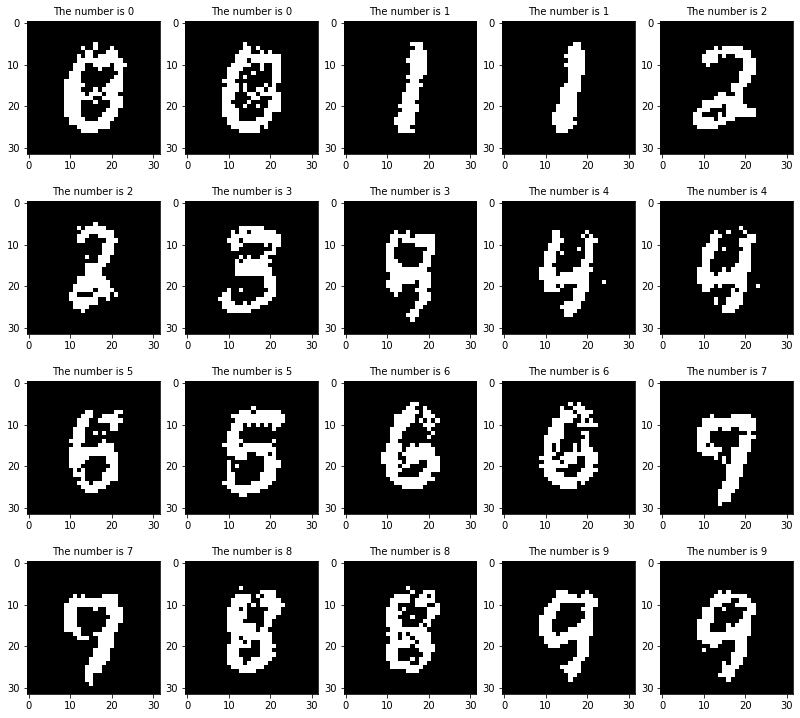

In [11]:
fig, ax = plt.subplots(4, 5, figsize=(11, 10), constrained_layout=True)
ax = ax.flatten()

for i in tqdm(range(10)):
    sample = model.conditional_sample(torch.tensor([i]), optmzr='adam', prior_model=None, opt=None)
    ax[2*i].imshow(sample.cpu().numpy().reshape([32, 32, 1]), cmap='gray')
    ax[2*i].set_title(f'The number is {i}', fontsize=10)
    
    sample = model.conditional_sample(torch.tensor([i]), optmzr='adam', prior_model=None, opt=None)
    ax[2*i+1].imshow(sample.cpu().numpy().reshape([32, 32, 1]), cmap='gray')
    ax[2*i+1].set_title(f'The number is {i}', fontsize=10)
    
plt.show()

100%|███████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.27s/it]


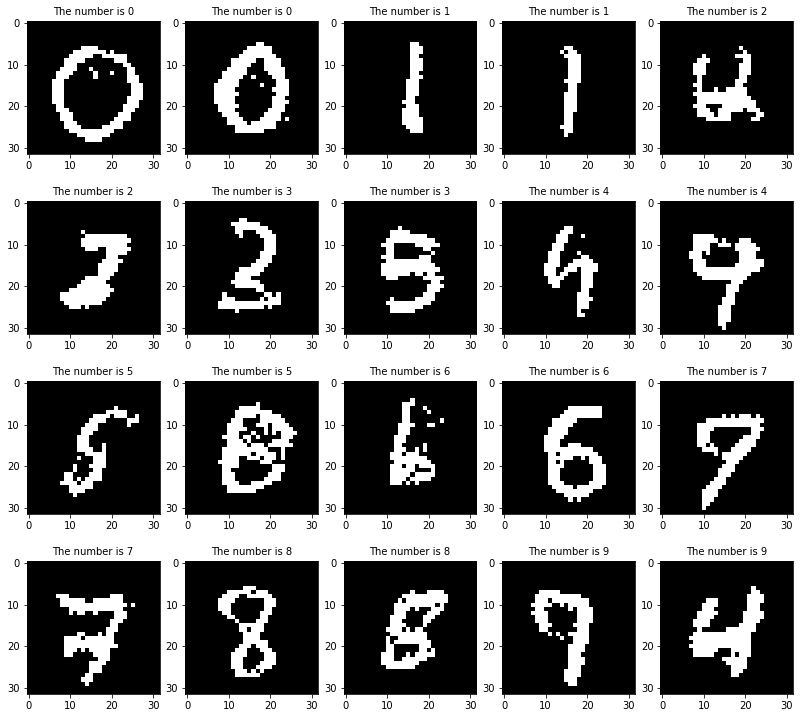

In [12]:
fig, ax = plt.subplots(4, 5, figsize=(11, 10), constrained_layout=True)
ax = ax.flatten()

for i in tqdm(range(10)):
    sample = model.conditional_sample(torch.tensor([i]), optmzr='adam', prior_model='vae', opt=second_opt)
    ax[2*i].imshow(sample.cpu().numpy().reshape([32, 32, 1]), cmap='gray')
    ax[2*i].set_title(f'The number is {i}', fontsize=10)
    
    sample = model.conditional_sample(torch.tensor([i]), optmzr='adam', prior_model='vae', opt=second_opt)
    ax[2*i+1].imshow(sample.cpu().numpy().reshape([32, 32, 1]), cmap='gray')
    ax[2*i+1].set_title(f'The number is {i}', fontsize=10)
    
plt.show()